In [462]:
import itertools
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from  joblib import dump, load

In [3]:
blood_pressure_df = pd.read_excel("datasets/PPG-BP dataset.xlsx", header = 1)

In [4]:
blood_pressure_df

,Num.,subject_ID,Sex(M/F),Age(year),Height(cm),Weight(kg),Systolic Blood Pressure(mmHg),Diastolic Blood Pressure(mmHg),Heart Rate(b/m),BMI(kg/m^2),Hypertension,Diabetes,cerebral infarction,cerebrovascular disease
0,1,2,Female,45,152,63,161,89,97,27.268006,Stage 2 hypertension,NaN,NaN,NaN
1,2,3,Female,50,157,50,160,93,76,20.284799,Stage 2 hypertension,NaN,NaN,NaN
2,3,6,Female,47,150,47,101,71,79,20.888889,Normal,NaN,NaN,NaN
3,4,8,Male,45,172,65,136,93,87,21.971336,Prehypertension,NaN,NaN,NaN
4,5,9,Female,46,155,65,123,73,73,27.055151,Prehypertension,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,215,415,Male,24,180,70,111,70,77,21.604938,Normal,NaN,NaN,NaN
215,216,416,Female,25,156,47,93,57,79,19.312952,Normal,NaN,NaN,NaN
216,217,417,Male,25,176,55,120,69,72,17.755682,Prehypertension,NaN,NaN,NaN
217,218,418,Male,25,173,63,106,69,67,21.049818,Normal,NaN,NaN,NaN


In [5]:
blood_pressure_df.drop(columns = ["subject_ID", "Num.", "Height(cm)", "Weight(kg)"], inplace = True)

In [6]:
blood_pressure_df.isnull().sum() / len(blood_pressure_df) * 100

Sex(M/F)                           0.000000
Age(year)                          0.000000
Systolic Blood Pressure(mmHg)      0.000000
Diastolic Blood Pressure(mmHg)     0.000000
Heart Rate(b/m)                    0.000000
BMI(kg/m^2)                        0.000000
Hypertension                       0.000000
Diabetes                          82.648402
cerebral infarction               90.867580
cerebrovascular disease           88.584475
dtype: float64

In [7]:
blood_pressure_df.drop(columns = ["Diabetes", "cerebral infarction", "cerebrovascular disease"], inplace = True)

In [8]:
pd.unique(blood_pressure_df["Sex(M/F)"])

array(['Female', 'Male'], dtype=object)

In [9]:
pd.unique(blood_pressure_df["Hypertension"])

array(['Stage 2 hypertension', 'Normal', 'Prehypertension',
       'Stage 1 hypertension'], dtype=object)

## Неудачная попытка

Оказывается, предметная область - медицина - не работает по принципам остальных областей. Здесь не нужно избавляться от выбросов, вместо декодирования категориальных данных на числовые - наоборот нужно декодировать числовые данные на категориальные. Каждый выброс уже предполагает заболевание, а числовые понятия веса, давления и пульса ничего не говорят нам и модели о реальных зависимостях. Зато категории нормальности и ненормальности этих признаков будут вполне информативными и удачно интерпретируются моделью, за счёт чего будут точнее выявлены явные зависимости и гипотезы.

In [ ]:
blood_pressure_df["Sex(M/F)"] = pd.factorize(blood_pressure_df["Sex(M/F)"])[0]

In [ ]:
blood_pressure_df["Hypertension"] = pd.factorize(blood_pressure_df["Hypertension"])[0]

In [ ]:
blood_pressure_df

,Sex(M/F),Age(year),Systolic Blood Pressure(mmHg),Diastolic Blood Pressure(mmHg),Heart Rate(b/m),BMI(kg/m^2),Hypertension
0,0,45,161,89,97,27.268006,0
1,0,50,160,93,76,20.284799,0
2,0,47,101,71,79,20.888889,1
3,1,45,136,93,87,21.971336,2
4,0,46,123,73,73,27.055151,2
...,...,...,...,...,...,...,...
214,1,24,111,70,77,21.604938,1
215,0,25,93,57,79,19.312952,1
216,1,25,120,69,72,17.755682,2
217,1,25,106,69,67,21.049818,1


In [ ]:
corr_matrix = blood_pressure_df.corr()

<Axes: ylabel='Age(year)'>

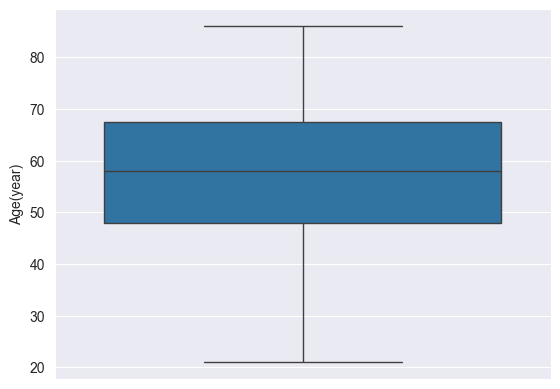

In [ ]:
sns.boxplot(data = blood_pressure_df["Age(year)"])

<Axes: ylabel='Systolic Blood Pressure(mmHg)'>

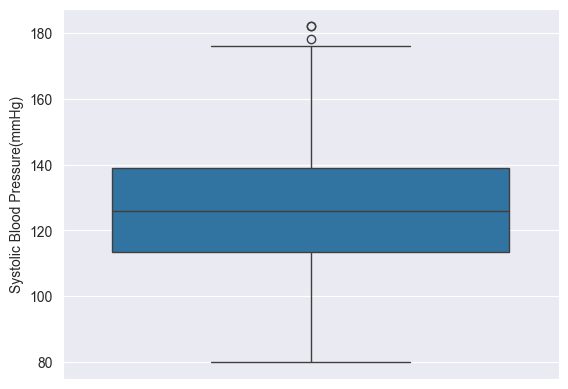

In [ ]:
sns.boxplot(data = blood_pressure_df["Systolic Blood Pressure(mmHg)"])

<Axes: ylabel='Diastolic Blood Pressure(mmHg)'>

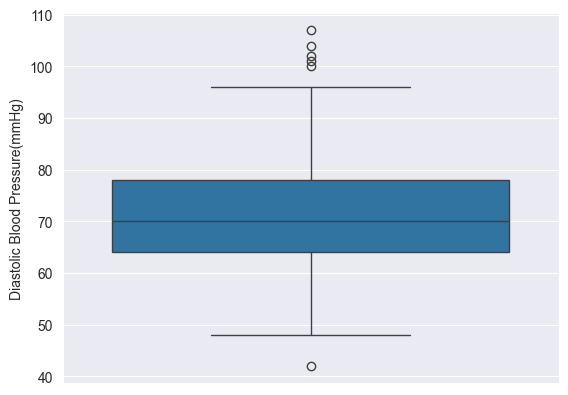

In [ ]:
sns.boxplot(data = blood_pressure_df["Diastolic Blood Pressure(mmHg)"])

<Axes: ylabel='Heart Rate(b/m)'>

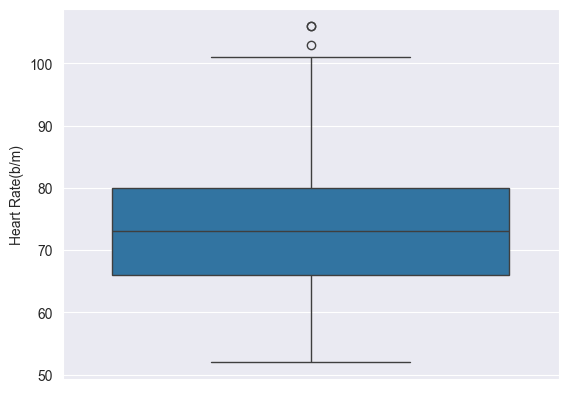

In [ ]:
sns.boxplot(data = blood_pressure_df["Heart Rate(b/m)"])

<Axes: ylabel='BMI(kg/m^2)'>

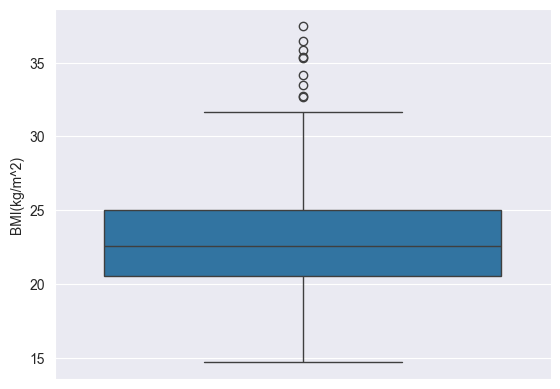

In [ ]:
sns.boxplot(data = blood_pressure_df["BMI(kg/m^2)"])

<Axes: >

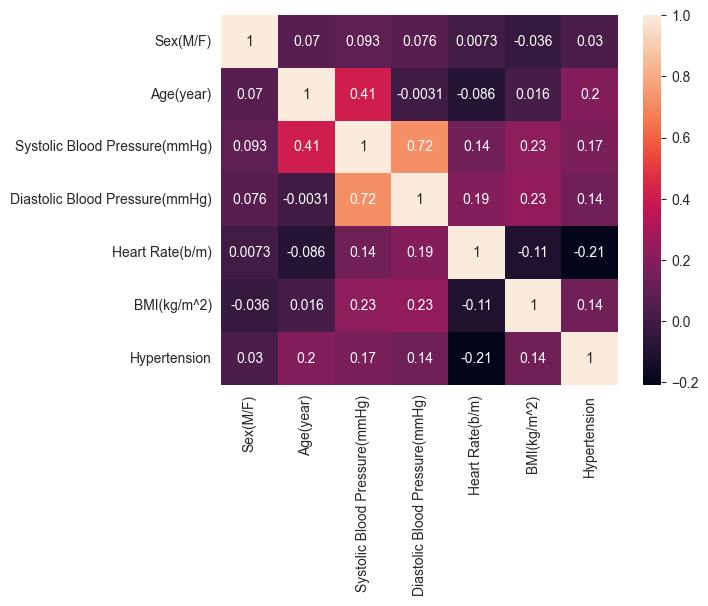

In [ ]:
sns.heatmap(data = corr_matrix, annot=True)

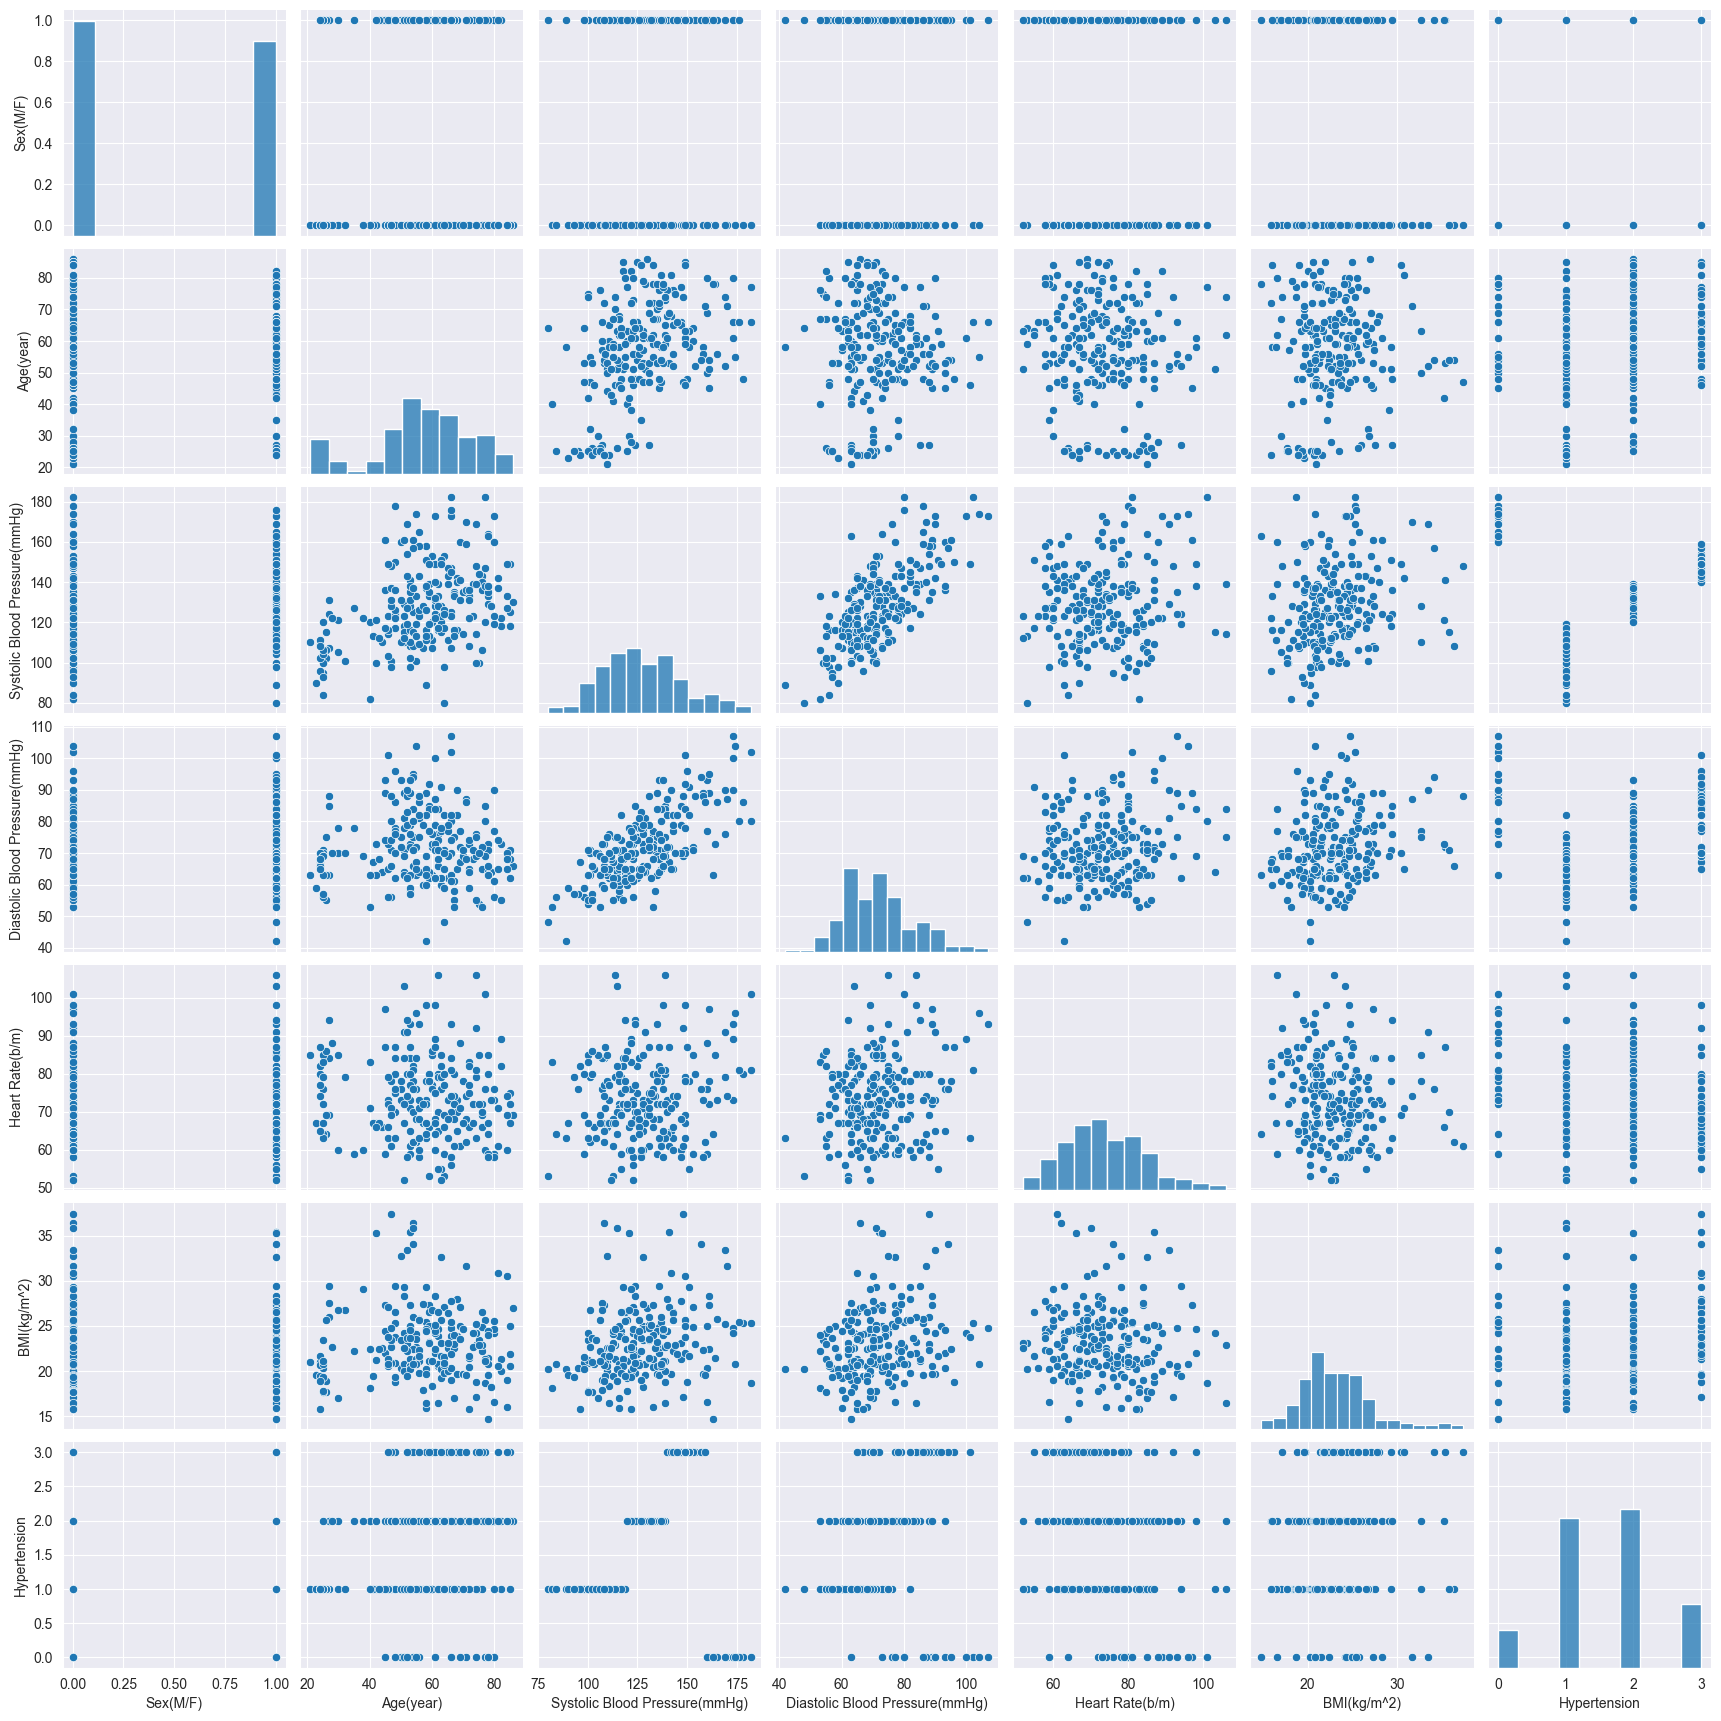

In [ ]:
sns.pairplot(data = blood_pressure_df)

In [ ]:
bp_df_dummies = pd.get_dummies(blood_pressure_df["Hypertension"])

In [ ]:
bp_df_dummies

,0,1,2,3
0,True,False,False,False
1,True,False,False,False
2,False,True,False,False
3,False,False,True,False
4,False,False,True,False
...,...,...,...,...
214,False,True,False,False
215,False,True,False,False
216,False,False,True,False
217,False,True,False,False


In [ ]:
bp_df_dummies = pd.merge(blood_pressure_df[blood_pressure_df.columns[:6]], bp_df_dummies, left_index=True, right_index=True)

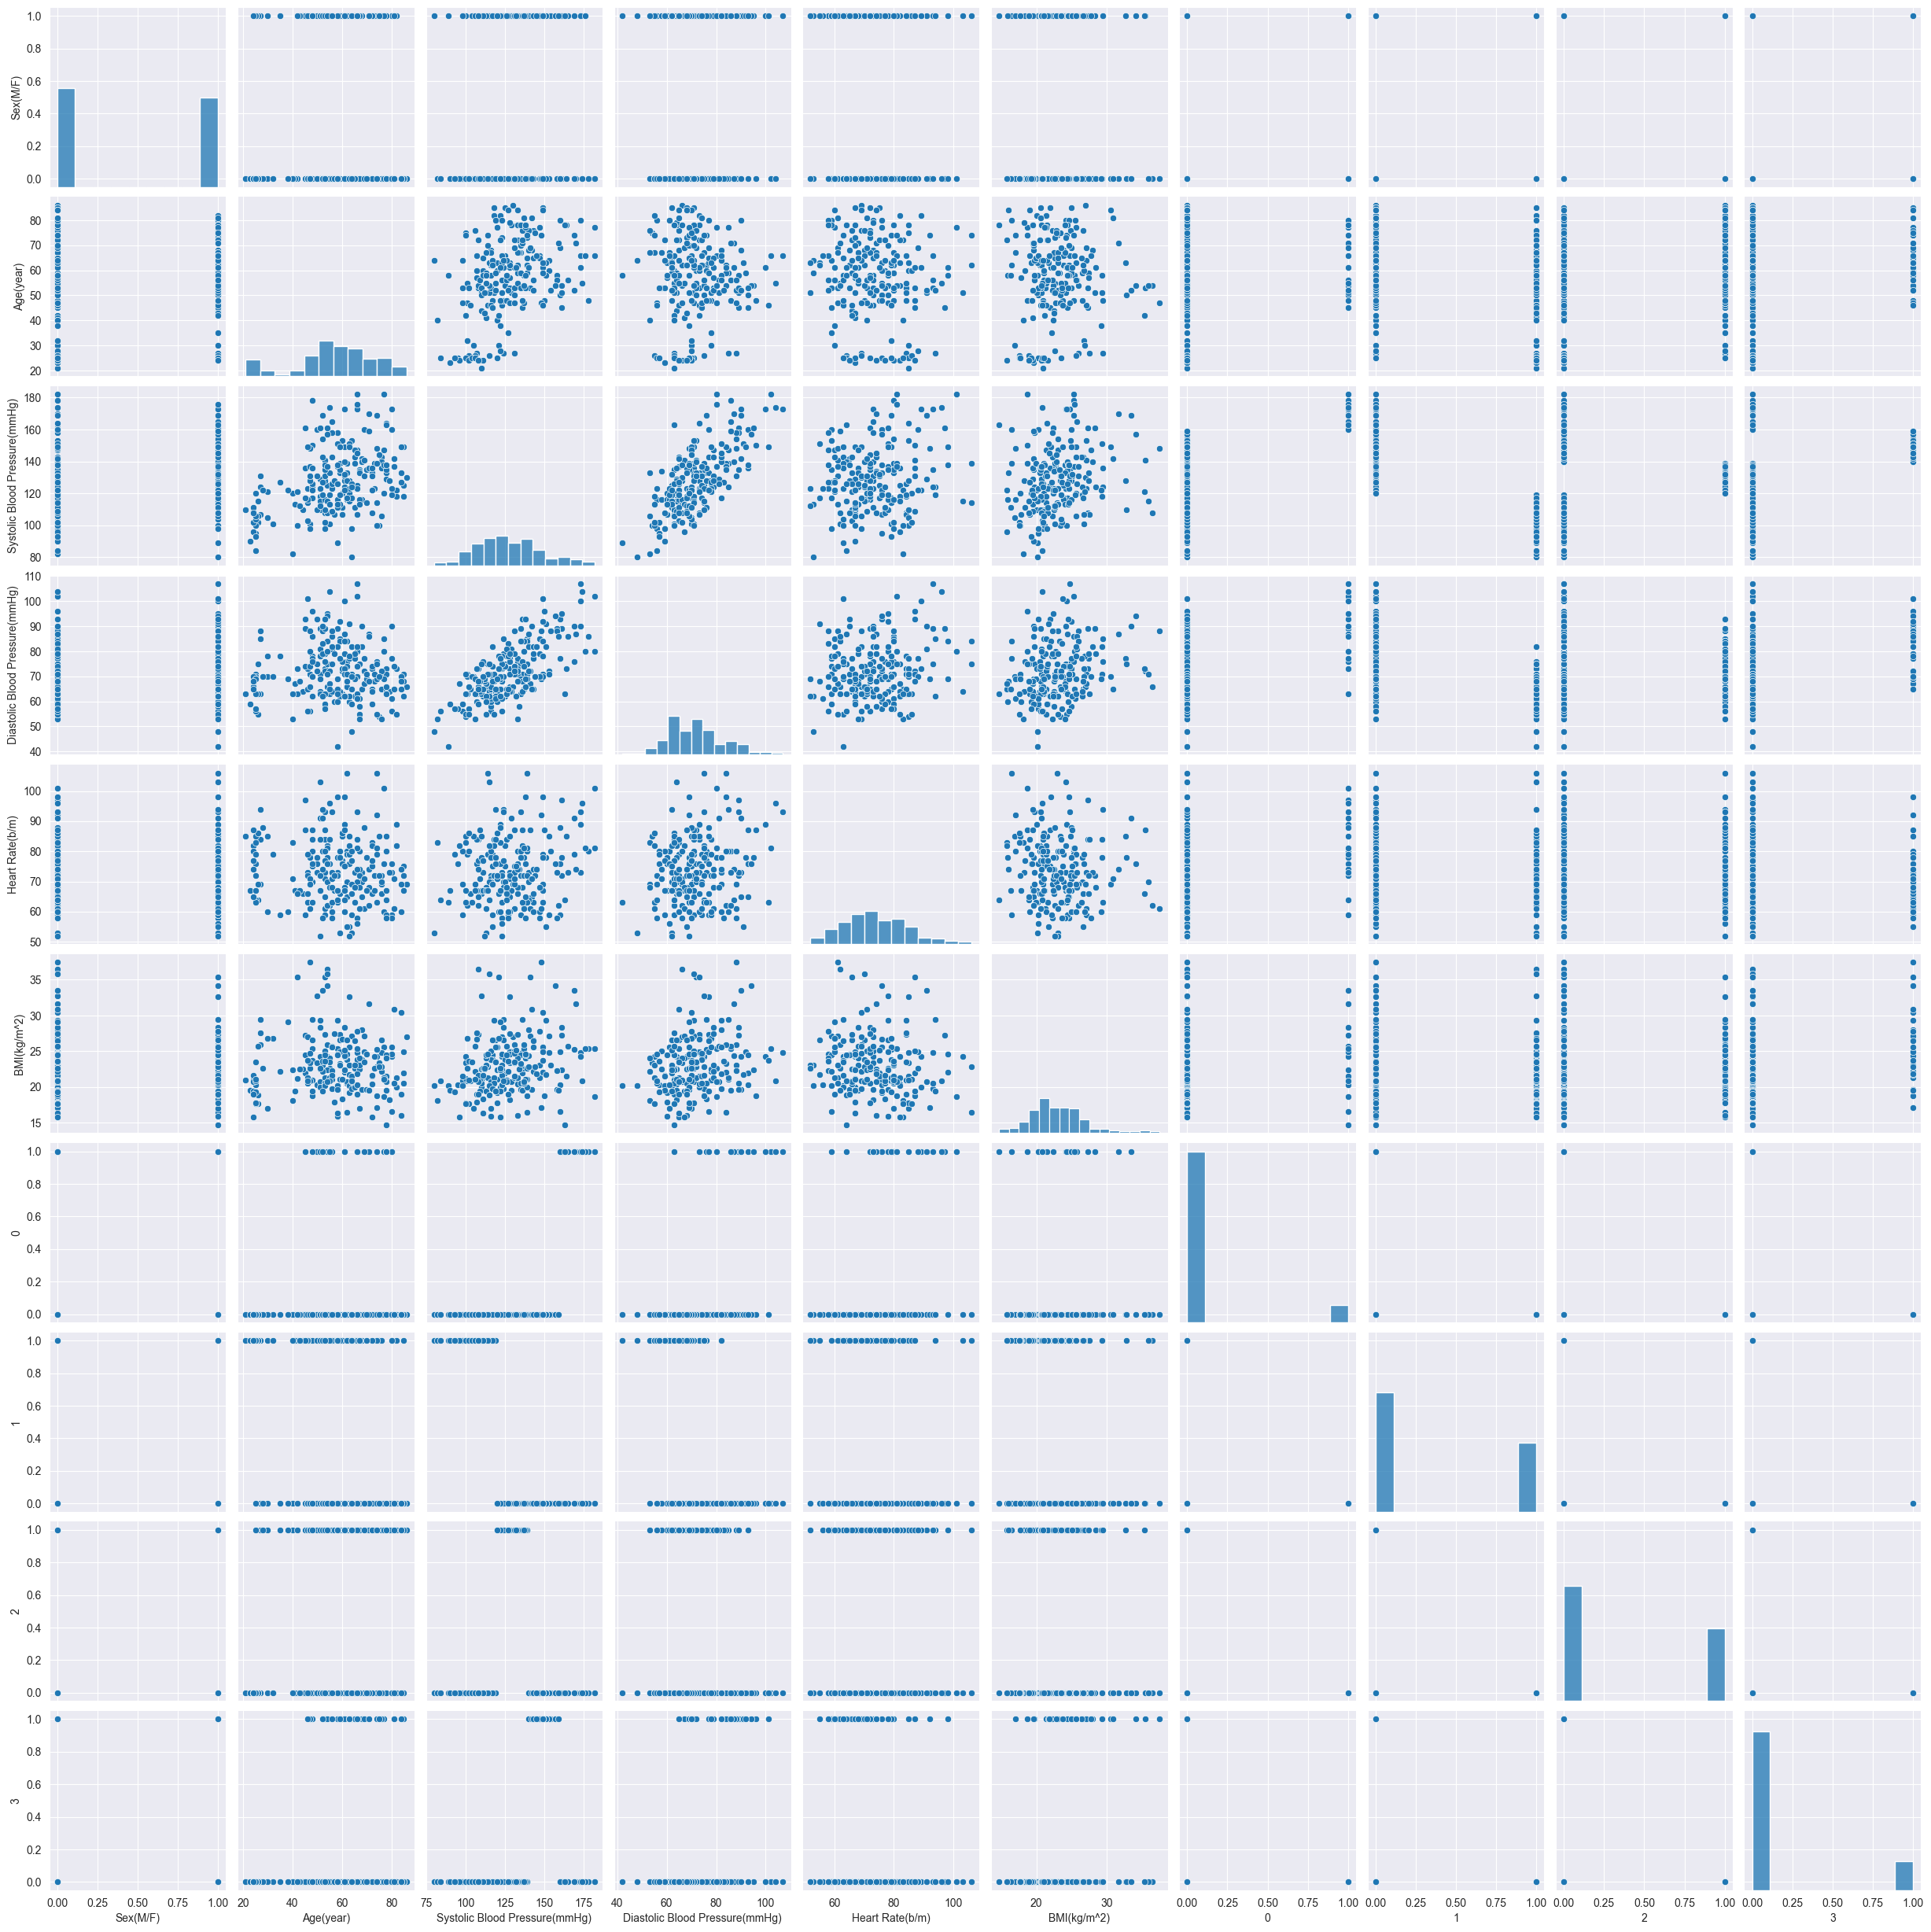

In [ ]:
sns.pairplot(data = bp_df_dummies)

<Axes: >

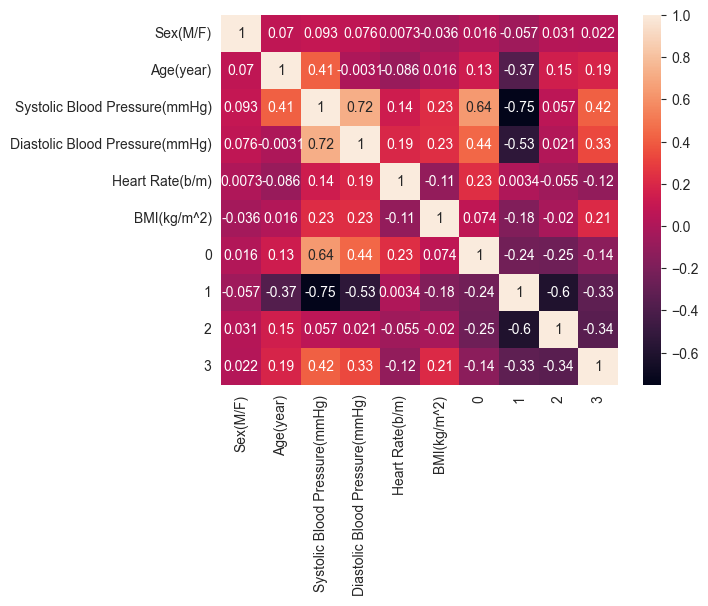

In [ ]:
corr_matrix = bp_df_dummies.corr()
sns.heatmap(data = corr_matrix, annot=True)

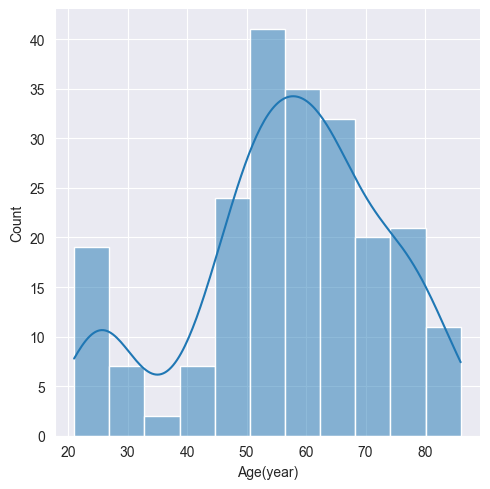

In [ ]:
sns.displot(bp_df_dummies["Age(year)"], kde = True)

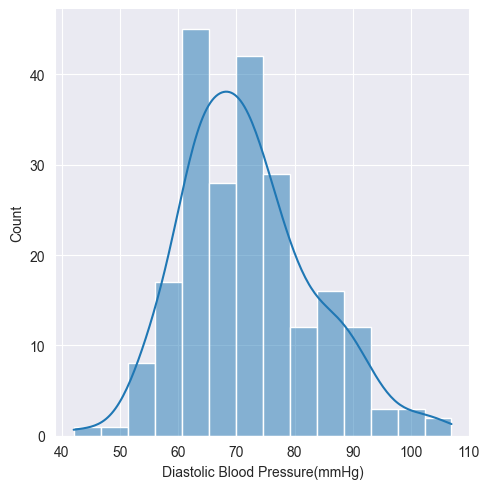

In [ ]:
sns.displot(bp_df_dummies["Diastolic Blood Pressure(mmHg)"], kde = True)

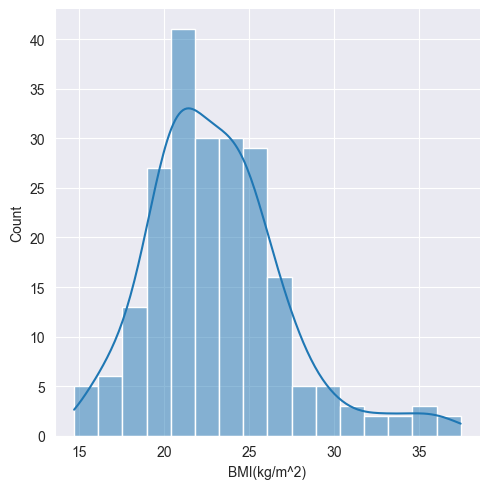

In [ ]:
sns.displot(bp_df_dummies["BMI(kg/m^2)"], kde = True)

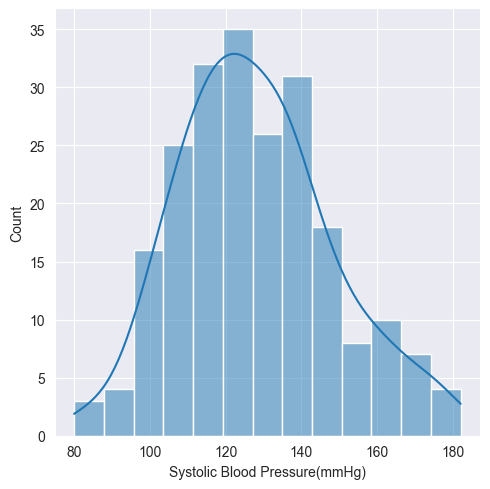

In [ ]:
sns.displot(bp_df_dummies["Systolic Blood Pressure(mmHg)"], kde = True)

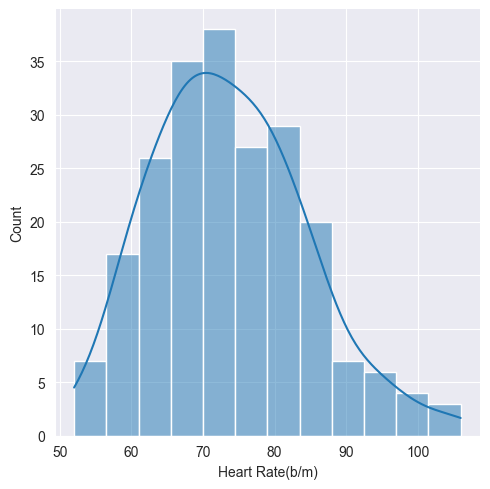

In [ ]:
sns.displot(bp_df_dummies["Heart Rate(b/m)"], kde = True)

In [ ]:
scores = (SelectKBest(score_func = chi2, k = "all").
          fit(blood_pressure_df[blood_pressure_df.columns[:6]],
              blood_pressure_df[["Hypertension"]]))

In [ ]:
df_scores = pd.DataFrame(scores.scores_)
df_columns = pd.DataFrame(blood_pressure_df.columns[:6])

featuresScores = pd.concat([df_scores, df_columns], axis = 1)
featuresScores.columns = ["Score", "Features"]

featuresScores.sort_values(by = ["Score"], inplace = True, ascending = False)
featuresScores

,Score,Features
2,618.582737,Systolic Blood Pressure(mmHg)
3,167.901374,Diastolic Blood Pressure(mmHg)
1,140.659789,Age(year)
4,21.240706,Heart Rate(b/m)
5,9.738388,BMI(kg/m^2)
0,0.373381,Sex(M/F)


Пытаемся преобразовать в нормальное распределение

In [ ]:
test = np.sqrt(abs(bp_df_dummies["Age(year)"] - bp_df_dummies["Age(year)"].mean()))

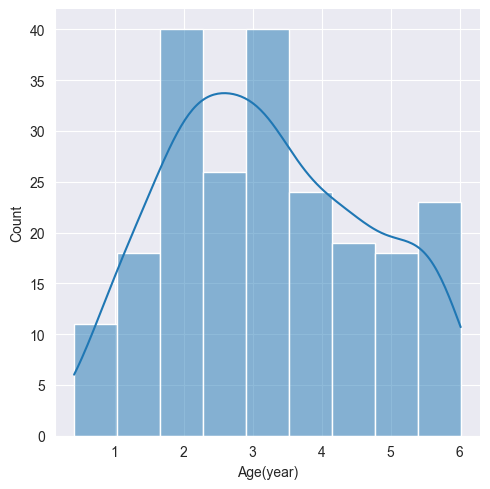

In [ ]:
sns.displot(test, kde = True)

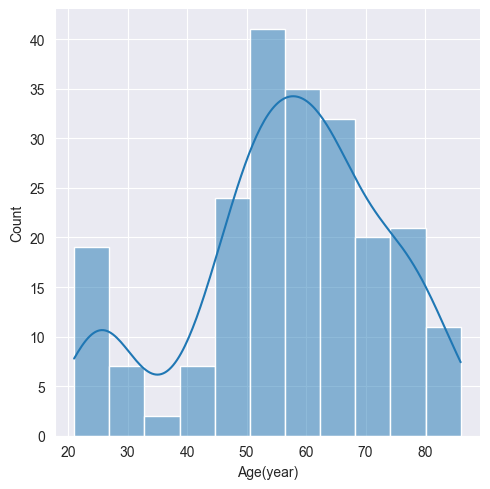

In [ ]:
sns.displot(bp_df_dummies["Age(year)"], kde = True)

<Axes: ylabel='Age(year)'>

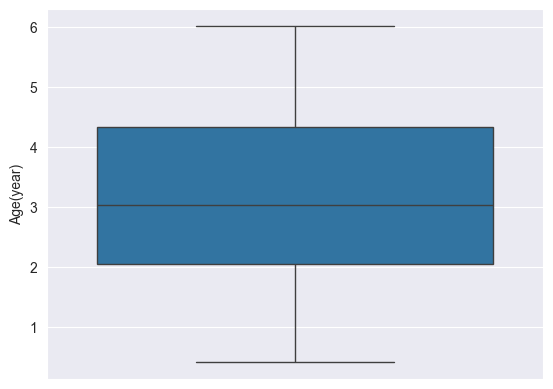

In [ ]:
sns.boxplot(test)

Надо избавиться от выбросов

In [ ]:
bp_df_dummies_copy = bp_df_dummies.copy()

In [ ]:
lower_q = bp_df_dummies_copy["Diastolic Blood Pressure(mmHg)"].quantile(0.05)
upper_q = bp_df_dummies_copy["Diastolic Blood Pressure(mmHg)"].quantile(0.95)

bp_df_dummies_copy["Diastolic Blood Pressure(mmHg)"] = bp_df_dummies_copy["Diastolic Blood Pressure(mmHg)"].clip(lower = lower_q, upper = upper_q)

<Axes: ylabel='Diastolic Blood Pressure(mmHg)'>

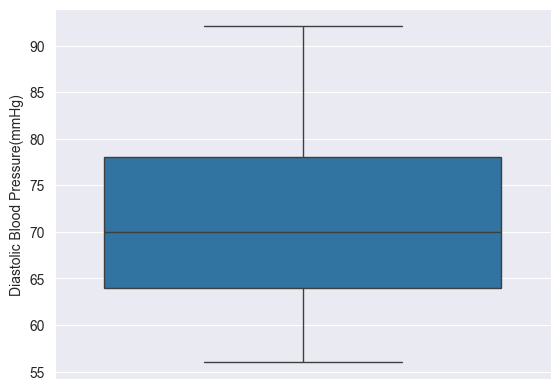

In [ ]:
sns.boxplot(bp_df_dummies_copy["Diastolic Blood Pressure(mmHg)"])

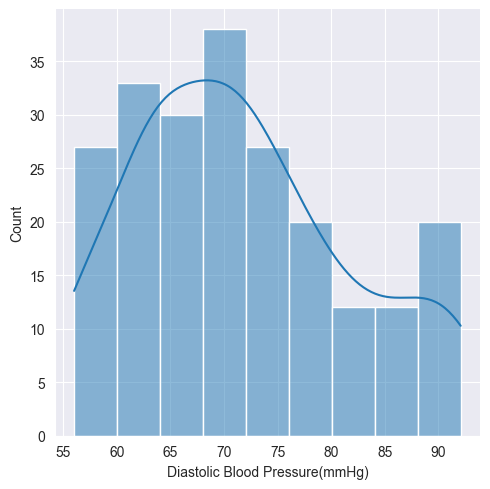

In [ ]:
sns.displot(bp_df_dummies_copy["Diastolic Blood Pressure(mmHg)"], kde = True)

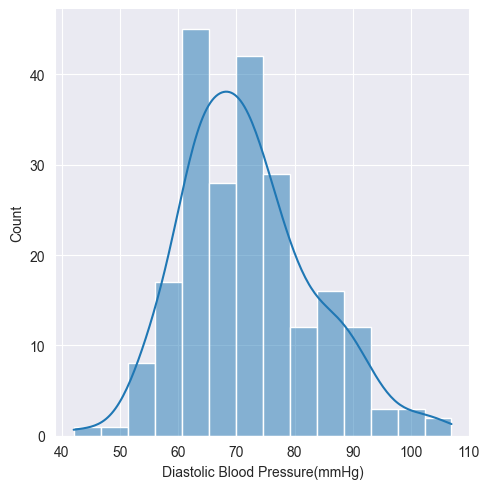

In [ ]:
sns.displot(bp_df_dummies["Diastolic Blood Pressure(mmHg)"], kde = True)

Думал объединить два признака: предгипертензию и гипертензию 1-й стадии. Но, видимо, неудачно

In [ ]:
percent_of_true_values = []

for i in range(len(bp_df_dummies.columns[6:])):
    percent_of_true_values.append((bp_df_dummies[i] == True).sum() / len(bp_df_dummies) * 100)

percent_of_true_values = pd.DataFrame(percent_of_true_values)
percent_of_true_values.index = ["2 Stage", "Normal", "Prehypertension", "1 Stage"]
percent_of_true_values.columns = ["Percent of True Values"]
percent_of_true_values

,Percent of True Values
2 Stage,9.132420
Normal,36.529680
Prehypertension,38.812785
1 Stage,15.525114


In [ ]:
bp_df_dummies3 = pd.DataFrame()

bp_df_dummies3[0] = bp_df_dummies[0]
bp_df_dummies3[1] = bp_df_dummies[1]
bp_df_dummies3[2] = bp_df_dummies[2] | bp_df_dummies[3]

bp_df_dummies3

,0,1,2
0,True,False,False
1,True,False,False
2,False,True,False
3,False,False,True
4,False,False,True
...,...,...,...
214,False,True,False
215,False,True,False
216,False,False,True
217,False,True,False


In [ ]:
bp_df_dummies3 = pd.merge(blood_pressure_df[blood_pressure_df.columns[:6]], bp_df_dummies3, left_index=True, right_index=True)

<Axes: >

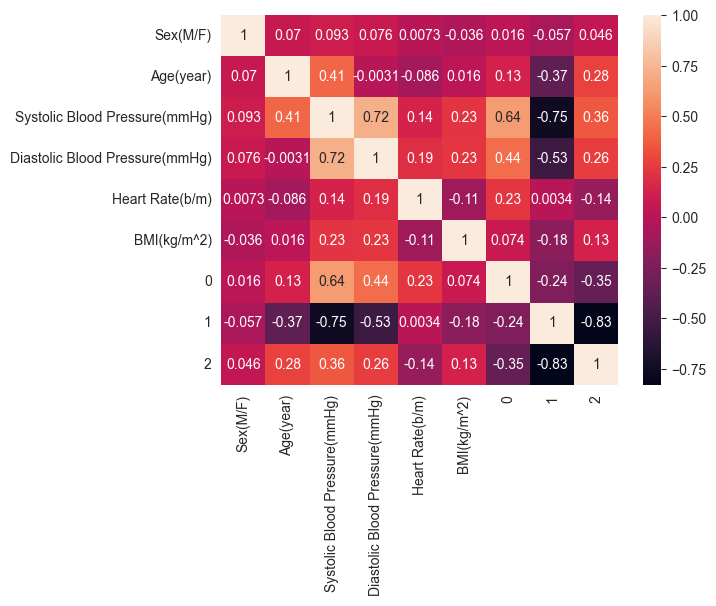

In [ ]:
sns.heatmap(data = bp_df_dummies3.corr(), annot=True)

<Axes: >

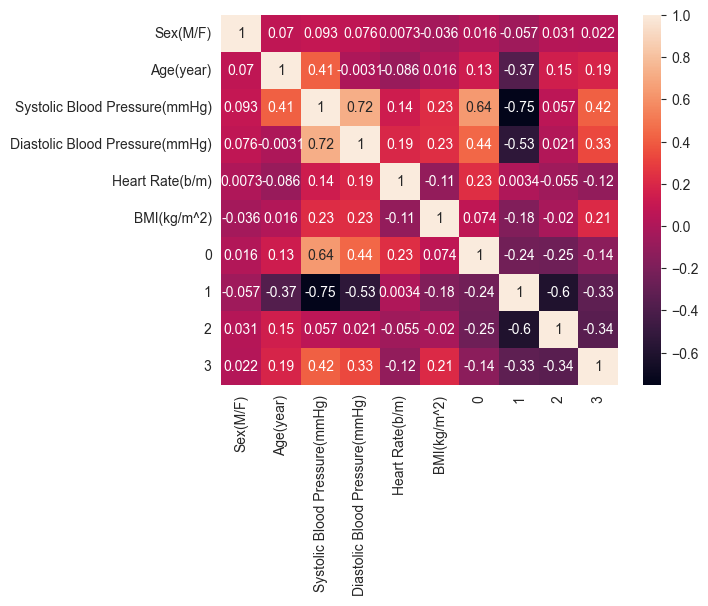

In [ ]:
sns.heatmap(bp_df_dummies.corr(), annot=True)

In [ ]:
bp_df_dummies_copy = bp_df_dummies.copy()

In [ ]:
for i in bp_df_dummies_copy.columns[:6][1:]:
    st = StandardScaler().fit(bp_df_dummies_copy[[i]])
    bp_df_dummies_copy[i] = st.transform(bp_df_dummies_copy[[i]])

In [ ]:
bp_df_dummies_copy

,Sex(M/F),Age(year),Systolic Blood Pressure(mmHg),Diastolic Blood Pressure(mmHg),Heart Rate(b/m),BMI(kg/m^2),0,1,2,3
0,0,-0.768337,1.625816,1.547085,2.180326,1.041372,True,False,False,False
1,0,-0.452641,1.576631,1.907907,0.220334,-0.706481,True,False,False,False
2,0,-0.642058,-1.325313,-0.076613,0.500333,-0.555281,False,True,False,False
3,1,-0.768337,0.396179,1.907907,1.246997,-0.284352,False,False,True,False
4,0,-0.705198,-0.243232,0.103798,-0.059665,0.988096,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
214,1,-2.094258,-0.833458,-0.166818,0.313667,-0.376059,False,True,False,False
215,0,-2.031119,-1.718797,-1.339489,0.500333,-0.949728,False,True,False,False
216,1,-2.031119,-0.390789,-0.257024,-0.152998,-1.339503,False,False,True,False
217,1,-2.031119,-1.079386,-0.257024,-0.619663,-0.515002,False,True,False,False


## Категоризация числовых значений

In [10]:
def CategorizePressure(df):
    systolic = df["Systolic Blood Pressure(mmHg)"]
    diastolic = df["Diastolic Blood Pressure(mmHg)"]

    conditions = [
        (systolic < 100) & (diastolic < 60),
        systolic.between(100, 119) & diastolic.between(60 , 79),
        systolic.between(120, 129) & diastolic.between(80, 84),
        systolic.between(130, 139) & diastolic.between(85, 89),
        systolic.between(140, 159) & diastolic.between(90, 99),
        systolic.between(160, 179) & diastolic.between(100, 109),
        (systolic > 180) & (diastolic > 110),
                  ]

    choices = [
        "Пониженное",
        "Оптимальное",
        "Нормальное",
        "Высокое нормальное",
        "Умеренная гипертония",
        "Гипертония ср. тяж.",
        "Тяжёлая гипертония"
              ]

    return np.select(conditions, choices, default = "Не определён")


In [15]:
df_copy = blood_pressure_df.copy()

In [12]:
df_copy["Category BP"] = CategorizePressure(df_copy)

In [13]:
df_copy

,Sex(M/F),Age(year),Systolic Blood Pressure(mmHg),Diastolic Blood Pressure(mmHg),Heart Rate(b/m),BMI(kg/m^2),Hypertension,Category BP
0,Female,45,161,89,97,27.268006,Stage 2 hypertension,Не определён
1,Female,50,160,93,76,20.284799,Stage 2 hypertension,Не определён
2,Female,47,101,71,79,20.888889,Normal,Оптимальное
3,Male,45,136,93,87,21.971336,Prehypertension,Не определён
4,Female,46,123,73,73,27.055151,Prehypertension,Не определён
...,...,...,...,...,...,...,...,...
214,Male,24,111,70,77,21.604938,Normal,Оптимальное
215,Female,25,93,57,79,19.312952,Normal,Пониженное
216,Male,25,120,69,72,17.755682,Prehypertension,Не определён
217,Male,25,106,69,67,21.049818,Normal,Оптимальное


In [14]:
(df_copy["Category BP"] == "Не определён").sum()

np.int64(137)

In [13]:
((df_copy["Diastolic Blood Pressure(mmHg)"] < 89) & (df_copy["Hypertension"] == "Stage 2 hypertension")).sum()

np.int64(10)

In [ ]:
((df_copy["Diastolic Blood Pressure(mmHg)"] > 89) & (df_copy["Hypertension"] == "Stage 2 hypertension")).sum()

np.int64(8)

In [ ]:
((df_copy["Diastolic Blood Pressure(mmHg)"] > 89) & (df_copy["Hypertension"] == "Stage 1 hypertension")).sum()

np.int64(6)

In [ ]:
((df_copy["Diastolic Blood Pressure(mmHg)"] < 89) & (df_copy["Hypertension"] == "Stage 1 hypertension")).sum()

np.int64(27)

In [ ]:
((df_copy["Diastolic Blood Pressure(mmHg)"] < 89) & (df_copy["Hypertension"] == "Normal")).sum()

np.int64(80)

In [ ]:
((df_copy["Diastolic Blood Pressure(mmHg)"] > 89) & (df_copy["Hypertension"] == "Normal")).sum()

np.int64(0)

Преобразование двух признаков в один как будто бы ошибка. Условно, высокое систолическое давление свидетельствует о гипертензии 2-й стадии, но диастолическое давление находится в норме. Поэтому появляются "Не определён".

In [16]:
def CategorizePressure(df: pd.DataFrame, isSystolic: bool):
    if isSystolic:
        categorizable = df["Systolic Blood Pressure(mmHg)"]
        values = [100, (100, 119), (120, 129), (130, 139), (140, 159), (160, 179), 180]
        _id: str = "Systolic"
    else:
        categorizable = df["Diastolic Blood Pressure(mmHg)"]
        values = [60, (60 , 79), (80, 84), (85, 89), (90, 99), (100, 109), 110]
        _id = "Diastolic"

    conditions = [
        (categorizable < values[0]),
        categorizable.between(values[1][0], values[1][1]),
        categorizable.between(values[2][0], values[2][1]),
        categorizable.between(values[3][0], values[3][1]),
        categorizable.between(values[4][0], values[4][1]),
        categorizable.between(values[5][0], values[5][1]),
        (categorizable > values[6]),
                  ]

    choices = [
        f"Пониженное {_id}",
        f"Оптимальное {_id}",
        f"Нормальное {_id}",
        f"Высокое нормальное {_id}",
        f"Умеренная гипертония {_id}",
        f"Гипертония ср. тяж. {_id}",
        f"Тяжёлая гипертония {_id}"
              ]

    return np.select(conditions, choices, default = "Не определён")

In [17]:
df_copy["Category SBP"] = CategorizePressure(df_copy, isSystolic = True)

In [18]:
df_copy["Category DBP"] = CategorizePressure(df_copy, isSystolic = False)

In [19]:
df_copy

,Sex(M/F),Age(year),Systolic Blood Pressure(mmHg),Diastolic Blood Pressure(mmHg),Heart Rate(b/m),BMI(kg/m^2),Hypertension,Category SBP,Category DBP
0,Female,45,161,89,97,27.268006,Stage 2 hypertension,Гипертония ср. тяж. Systolic,Высокое нормальное Diastolic
1,Female,50,160,93,76,20.284799,Stage 2 hypertension,Гипертония ср. тяж. Systolic,Умеренная гипертония Diastolic
2,Female,47,101,71,79,20.888889,Normal,Оптимальное Systolic,Оптимальное Diastolic
3,Male,45,136,93,87,21.971336,Prehypertension,Высокое нормальное Systolic,Умеренная гипертония Diastolic
4,Female,46,123,73,73,27.055151,Prehypertension,Нормальное Systolic,Оптимальное Diastolic
...,...,...,...,...,...,...,...,...,...
214,Male,24,111,70,77,21.604938,Normal,Оптимальное Systolic,Оптимальное Diastolic
215,Female,25,93,57,79,19.312952,Normal,Пониженное Systolic,Пониженное Diastolic
216,Male,25,120,69,72,17.755682,Prehypertension,Нормальное Systolic,Оптимальное Diastolic
217,Male,25,106,69,67,21.049818,Normal,Оптимальное Systolic,Оптимальное Diastolic


In [17]:
(df_copy["Category DBP"] == "Не определён").sum()

np.int64(0)

In [18]:
(df_copy["Category SBP"] == "Не определён").sum()

np.int64(0)

In [20]:
def CategorizePulse(df):
    categorizable = df["Heart Rate(b/m)"]

    conditions = [
        (categorizable < 60),
        categorizable.between(60, 70),
        categorizable > 70
                  ]

    choices = [
        "Пониженный пульс",
        "Нормальный пульс",
        "Высокий пульс",
              ]

    return np.select(conditions, choices, default = "Не определён")

In [21]:
df_copy["Category Pulse"] = CategorizePulse(df_copy)

In [15]:
df_copy

,Sex(M/F),Age(year),Systolic Blood Pressure(mmHg),Diastolic Blood Pressure(mmHg),Heart Rate(b/m),BMI(kg/m^2),Hypertension,Category SBP,Category DBP,Category Pulse
0,Female,45,161,89,97,27.268006,Stage 2 hypertension,Гипертония ср. тяж. Systolic,Высокое нормальное Diastolic,Высокий пульс
1,Female,50,160,93,76,20.284799,Stage 2 hypertension,Гипертония ср. тяж. Systolic,Умеренная гипертония Diastolic,Высокий пульс
2,Female,47,101,71,79,20.888889,Normal,Оптимальное Systolic,Оптимальное Diastolic,Высокий пульс
3,Male,45,136,93,87,21.971336,Prehypertension,Высокое нормальное Systolic,Умеренная гипертония Diastolic,Высокий пульс
4,Female,46,123,73,73,27.055151,Prehypertension,Нормальное Systolic,Оптимальное Diastolic,Высокий пульс
...,...,...,...,...,...,...,...,...,...,...
214,Male,24,111,70,77,21.604938,Normal,Оптимальное Systolic,Оптимальное Diastolic,Высокий пульс
215,Female,25,93,57,79,19.312952,Normal,Пониженное Systolic,Пониженное Diastolic,Высокий пульс
216,Male,25,120,69,72,17.755682,Prehypertension,Нормальное Systolic,Оптимальное Diastolic,Высокий пульс
217,Male,25,106,69,67,21.049818,Normal,Оптимальное Systolic,Оптимальное Diastolic,Нормальный пульс


In [23]:
(df_copy["Category Pulse"] == "Не определён").sum()

np.int64(0)

In [24]:
(df_copy["Category Pulse"] == "Высокое").sum()

np.int64(128)

In [25]:
(df_copy["Category Pulse"] == "Нормальное").sum()

np.int64(73)

In [26]:
(df_copy["Category Pulse"] == "Пониженное").sum()

np.int64(18)

In [29]:
((df_copy["Category Pulse"] == "Высокое") & (df_copy["Hypertension"] == "Stage 1 hypertension")).sum()

np.int64(16)

In [30]:
((df_copy["Category Pulse"] == "Высокое") & (df_copy["Hypertension"] == "Normal")).sum()

np.int64(45)

In [31]:
((df_copy["Category Pulse"] == "Высокое") & (df_copy["Hypertension"] == "Prehypertension")).sum()

np.int64(49)

In [32]:
((df_copy["Category Pulse"] == "Нормальное") & (df_copy["Hypertension"] == "Stage 1 hypertension")).sum()

np.int64(14)

In [34]:
((df_copy["Category Pulse"] == "Нормальное") & (df_copy["Hypertension"] == "Prehypertension")).sum()

np.int64(29)

In [22]:
def CategorizeBMI(df):
    categorizable = df["BMI(kg/m^2)"]

    conditions = [
        (categorizable < 16),
        categorizable.between(16, 18.444),
        categorizable.between(18.5, 24.999),
        categorizable.between(25, 29.999),
        categorizable.between(30, 34.999),
        categorizable.between(35, 39.999),
        categorizable > 40
                  ]

    choices = [
        "Очень низкий BMI",
        "Низкий BMI",
        "Обычный BMI",
        "Повышенный BMI",
        "Высокий BMI",
        "Очень высокий BMI",
        "Чрезвычайно высокий BMI"
              ]

    return np.select(conditions, choices, default = "Не определён")

In [23]:
df_copy["Category BMI"] = CategorizeBMI(df_copy)

In [18]:
df_copy

,Sex(M/F),Age(year),Systolic Blood Pressure(mmHg),Diastolic Blood Pressure(mmHg),Heart Rate(b/m),BMI(kg/m^2),Hypertension,Category SBP,Category DBP,Category Pulse,Category BMI
0,Female,45,161,89,97,27.268006,Stage 2 hypertension,Гипертония ср. тяж. Systolic,Высокое нормальное Diastolic,Высокий пульс,Повышенный BMI
1,Female,50,160,93,76,20.284799,Stage 2 hypertension,Гипертония ср. тяж. Systolic,Умеренная гипертония Diastolic,Высокий пульс,Обычный BMI
2,Female,47,101,71,79,20.888889,Normal,Оптимальное Systolic,Оптимальное Diastolic,Высокий пульс,Обычный BMI
3,Male,45,136,93,87,21.971336,Prehypertension,Высокое нормальное Systolic,Умеренная гипертония Diastolic,Высокий пульс,Обычный BMI
4,Female,46,123,73,73,27.055151,Prehypertension,Нормальное Systolic,Оптимальное Diastolic,Высокий пульс,Повышенный BMI
...,...,...,...,...,...,...,...,...,...,...,...
214,Male,24,111,70,77,21.604938,Normal,Оптимальное Systolic,Оптимальное Diastolic,Высокий пульс,Обычный BMI
215,Female,25,93,57,79,19.312952,Normal,Пониженное Systolic,Пониженное Diastolic,Высокий пульс,Обычный BMI
216,Male,25,120,69,72,17.755682,Prehypertension,Нормальное Systolic,Оптимальное Diastolic,Высокий пульс,Низкий BMI
217,Male,25,106,69,67,21.049818,Normal,Оптимальное Systolic,Оптимальное Diastolic,Нормальный пульс,Обычный BMI


In [31]:
df_copy["Category BMI"].unique()

array(['Повышенный BMI', 'Обычный BMI', 'Очень высокий BMI', 'Низкий BMI',
       'Высокий BMI', 'Очень низкий BMI'], dtype=object)

In [41]:
df_copy.loc[df_copy["Category BMI"] == "Не определён"]

,Sex(M/F),Age(year),Systolic Blood Pressure(mmHg),Diastolic Blood Pressure(mmHg),Heart Rate(b/m),BMI(kg/m^2),Hypertension,Category SBP,Category DBP,Category Pulse,Category BMI
87,Female,69,160,77,88,24.973985,Stage 2 hypertension,Гипертония ср. тяж.,Оптимальное,Высокое,Не определён
97,Female,85,149,71,67,24.973985,Stage 1 hypertension,Умеренная гипертония,Оптимальное,Нормальное,Не определён
125,Female,61,128,73,60,24.977043,Prehypertension,Нормальное,Оптимальное,Нормальное,Не определён
168,Male,59,149,92,78,24.977043,Stage 1 hypertension,Умеренная гипертония,Умеренная гипертония,Высокое,Не определён


In [24]:
df_copy.drop(columns = ["Systolic Blood Pressure(mmHg)",
                        "Diastolic Blood Pressure(mmHg)",
                        "Heart Rate(b/m)", "BMI(kg/m^2)"], inplace = True)

In [25]:
df_copy

,Sex(M/F),Age(year),Hypertension,Category SBP,Category DBP,Category Pulse,Category BMI
0,Female,45,Stage 2 hypertension,Гипертония ср. тяж. Systolic,Высокое нормальное Diastolic,Высокий пульс,Повышенный BMI
1,Female,50,Stage 2 hypertension,Гипертония ср. тяж. Systolic,Умеренная гипертония Diastolic,Высокий пульс,Обычный BMI
2,Female,47,Normal,Оптимальное Systolic,Оптимальное Diastolic,Высокий пульс,Обычный BMI
3,Male,45,Prehypertension,Высокое нормальное Systolic,Умеренная гипертония Diastolic,Высокий пульс,Обычный BMI
4,Female,46,Prehypertension,Нормальное Systolic,Оптимальное Diastolic,Высокий пульс,Повышенный BMI
...,...,...,...,...,...,...,...
214,Male,24,Normal,Оптимальное Systolic,Оптимальное Diastolic,Высокий пульс,Обычный BMI
215,Female,25,Normal,Пониженное Systolic,Пониженное Diastolic,Высокий пульс,Обычный BMI
216,Male,25,Prehypertension,Нормальное Systolic,Оптимальное Diastolic,Высокий пульс,Низкий BMI
217,Male,25,Normal,Оптимальное Systolic,Оптимальное Diastolic,Нормальный пульс,Обычный BMI


In [34]:
df_dummies = pd.get_dummies(df_copy["Category SBP"])

In [49]:
df_dummies

,Высокое нормальное,Гипертония ср. тяж.,Нормальное,Оптимальное,Пониженное,Тяжёлая гипертония,Умеренная гипертония
0,False,True,False,False,False,False,False
1,False,True,False,False,False,False,False
2,False,False,False,True,False,False,False
3,True,False,False,False,False,False,False
4,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...
214,False,False,False,True,False,False,False
215,False,False,False,False,True,False,False
216,False,False,True,False,False,False,False
217,False,False,False,True,False,False,False


In [35]:
df_dummies = pd.concat([pd.get_dummies(df_copy["Category DBP"]), df_dummies], axis = 1)

In [81]:
df_dummies

,D_Высокое нормальное,D_Гипертония ср. тяж.,D_Нормальное,D_Оптимальное,D_Пониженное,D_Умеренная гипертония,Высокое нормальное,Гипертония ср. тяж.,Нормальное,Оптимальное,Пониженное,Тяжёлая гипертония,Умеренная гипертония
0,True,False,False,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,True,False,True,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,False,False,False,True,False,False,False,False,False,True,False,False,False
215,False,False,False,False,True,False,False,False,False,False,True,False,False
216,False,False,False,True,False,False,False,False,True,False,False,False,False
217,False,False,False,True,False,False,False,False,False,True,False,False,False


In [36]:
df_dummies = pd.concat([pd.get_dummies(df_copy["Category Pulse"]), df_dummies], axis = 1)

In [37]:
df_dummies = pd.concat([pd.get_dummies(df_copy["Category BMI"]), df_dummies], axis = 1)

In [38]:
df_dummies

,Высокий BMI,Низкий BMI,Обычный BMI,Очень высокий BMI,Очень низкий BMI,Повышенный BMI,Высокий пульс,Нормальный пульс,Пониженный пульс,Высокое нормальное Diastolic,...,Оптимальное Diastolic,Пониженное Diastolic,Умеренная гипертония Diastolic,Высокое нормальное Systolic,Гипертония ср. тяж. Systolic,Нормальное Systolic,Оптимальное Systolic,Пониженное Systolic,Тяжёлая гипертония Systolic,Умеренная гипертония Systolic
0,False,False,False,False,False,True,True,False,False,True,...,False,False,False,False,True,False,False,False,False,False
1,False,False,True,False,False,False,True,False,False,False,...,False,False,True,False,True,False,False,False,False,False
2,False,False,True,False,False,False,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,False,False,True,False,False,False,True,False,False,False,...,False,False,True,True,False,False,False,False,False,False
4,False,False,False,False,False,True,True,False,False,False,...,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,False,False,True,False,False,False,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False
215,False,False,True,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,True,False,False
216,False,True,False,False,False,False,True,False,False,False,...,True,False,False,False,False,True,False,False,False,False
217,False,False,True,False,False,False,False,True,False,False,...,True,False,False,False,False,False,True,False,False,False


In [39]:
df_dummies = pd.concat([pd.get_dummies(df_copy["Hypertension"]), df_dummies], axis = 1)

In [40]:
df_dummies

,Normal,Prehypertension,Stage 1 hypertension,Stage 2 hypertension,Высокий BMI,Низкий BMI,Обычный BMI,Очень высокий BMI,Очень низкий BMI,Повышенный BMI,...,Оптимальное Diastolic,Пониженное Diastolic,Умеренная гипертония Diastolic,Высокое нормальное Systolic,Гипертония ср. тяж. Systolic,Нормальное Systolic,Оптимальное Systolic,Пониженное Systolic,Тяжёлая гипертония Systolic,Умеренная гипертония Systolic
0,False,False,False,True,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
1,False,False,False,True,False,False,True,False,False,False,...,False,False,True,False,True,False,False,False,False,False
2,True,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,False,True,False,False,False,False,True,False,False,False,...,False,False,True,True,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,True,...,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,True,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False
215,True,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,True,False,False
216,False,True,False,False,False,True,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
217,True,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False


In [41]:
df_dummies = pd.concat([pd.get_dummies(df_copy["Sex(M/F)"]), df_dummies], axis = 1)

In [42]:
df_dummies = pd.concat([df_copy["Age(year)"], df_dummies], axis = 1)

In [43]:
df_dummies

,Age(year),Female,Male,Normal,Prehypertension,Stage 1 hypertension,Stage 2 hypertension,Высокий BMI,Низкий BMI,Обычный BMI,...,Оптимальное Diastolic,Пониженное Diastolic,Умеренная гипертония Diastolic,Высокое нормальное Systolic,Гипертония ср. тяж. Systolic,Нормальное Systolic,Оптимальное Systolic,Пониженное Systolic,Тяжёлая гипертония Systolic,Умеренная гипертония Systolic
0,45,True,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,50,True,False,False,False,False,True,False,False,True,...,False,False,True,False,True,False,False,False,False,False
2,47,True,False,True,False,False,False,False,False,True,...,True,False,False,False,False,False,True,False,False,False
3,45,False,True,False,True,False,False,False,False,True,...,False,False,True,True,False,False,False,False,False,False
4,46,True,False,False,True,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,24,False,True,True,False,False,False,False,False,True,...,True,False,False,False,False,False,True,False,False,False
215,25,True,False,True,False,False,False,False,False,True,...,False,True,False,False,False,False,False,True,False,False
216,25,False,True,False,True,False,False,False,True,False,...,True,False,False,False,False,True,False,False,False,False
217,25,False,True,True,False,False,False,False,False,True,...,True,False,False,False,False,False,True,False,False,False


In [44]:
df_dummies.iloc[:, 1:] = df_dummies.iloc[:, 1:].astype(dtype = int)

C:\Users\romeow\AppData\Local\Temp\ipykernel_1412\1794360465.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      1
1      1
2      1
3      0
4      1
      ..
214    0
215    1
216    0
217    0
218    0
Name: Female, Length: 219, dtype: int64' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_dummies.iloc[:, 1:] = df_dummies.iloc[:, 1:].astype(dtype = int)
C:\Users\romeow\AppData\Local\Temp\ipykernel_1412\1794360465.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      0
1      0
2      0
3      1
4      0
      ..
214    1
215    0
216    1
217    1
218    1
Name: Male, Length: 219, dtype: int64' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_dummies.iloc[:, 1:] = df_dummies.iloc[:, 1:].astype(dtype = int)
C:\Users\romeow\AppData\Local\Temp\ipyke

In [45]:
df_dummies

,Age(year),Female,Male,Normal,Prehypertension,Stage 1 hypertension,Stage 2 hypertension,Высокий BMI,Низкий BMI,Обычный BMI,...,Оптимальное Diastolic,Пониженное Diastolic,Умеренная гипертония Diastolic,Высокое нормальное Systolic,Гипертония ср. тяж. Systolic,Нормальное Systolic,Оптимальное Systolic,Пониженное Systolic,Тяжёлая гипертония Systolic,Умеренная гипертония Systolic
0,45,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,50,1,0,0,0,0,1,0,0,1,...,0,0,1,0,1,0,0,0,0,0
2,47,1,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
3,45,0,1,0,1,0,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0
4,46,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,24,0,1,1,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
215,25,1,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
216,25,0,1,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
217,25,0,1,1,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0


In [86]:
df_dummies.drop(columns = ["Hypertension"], inplace = True)

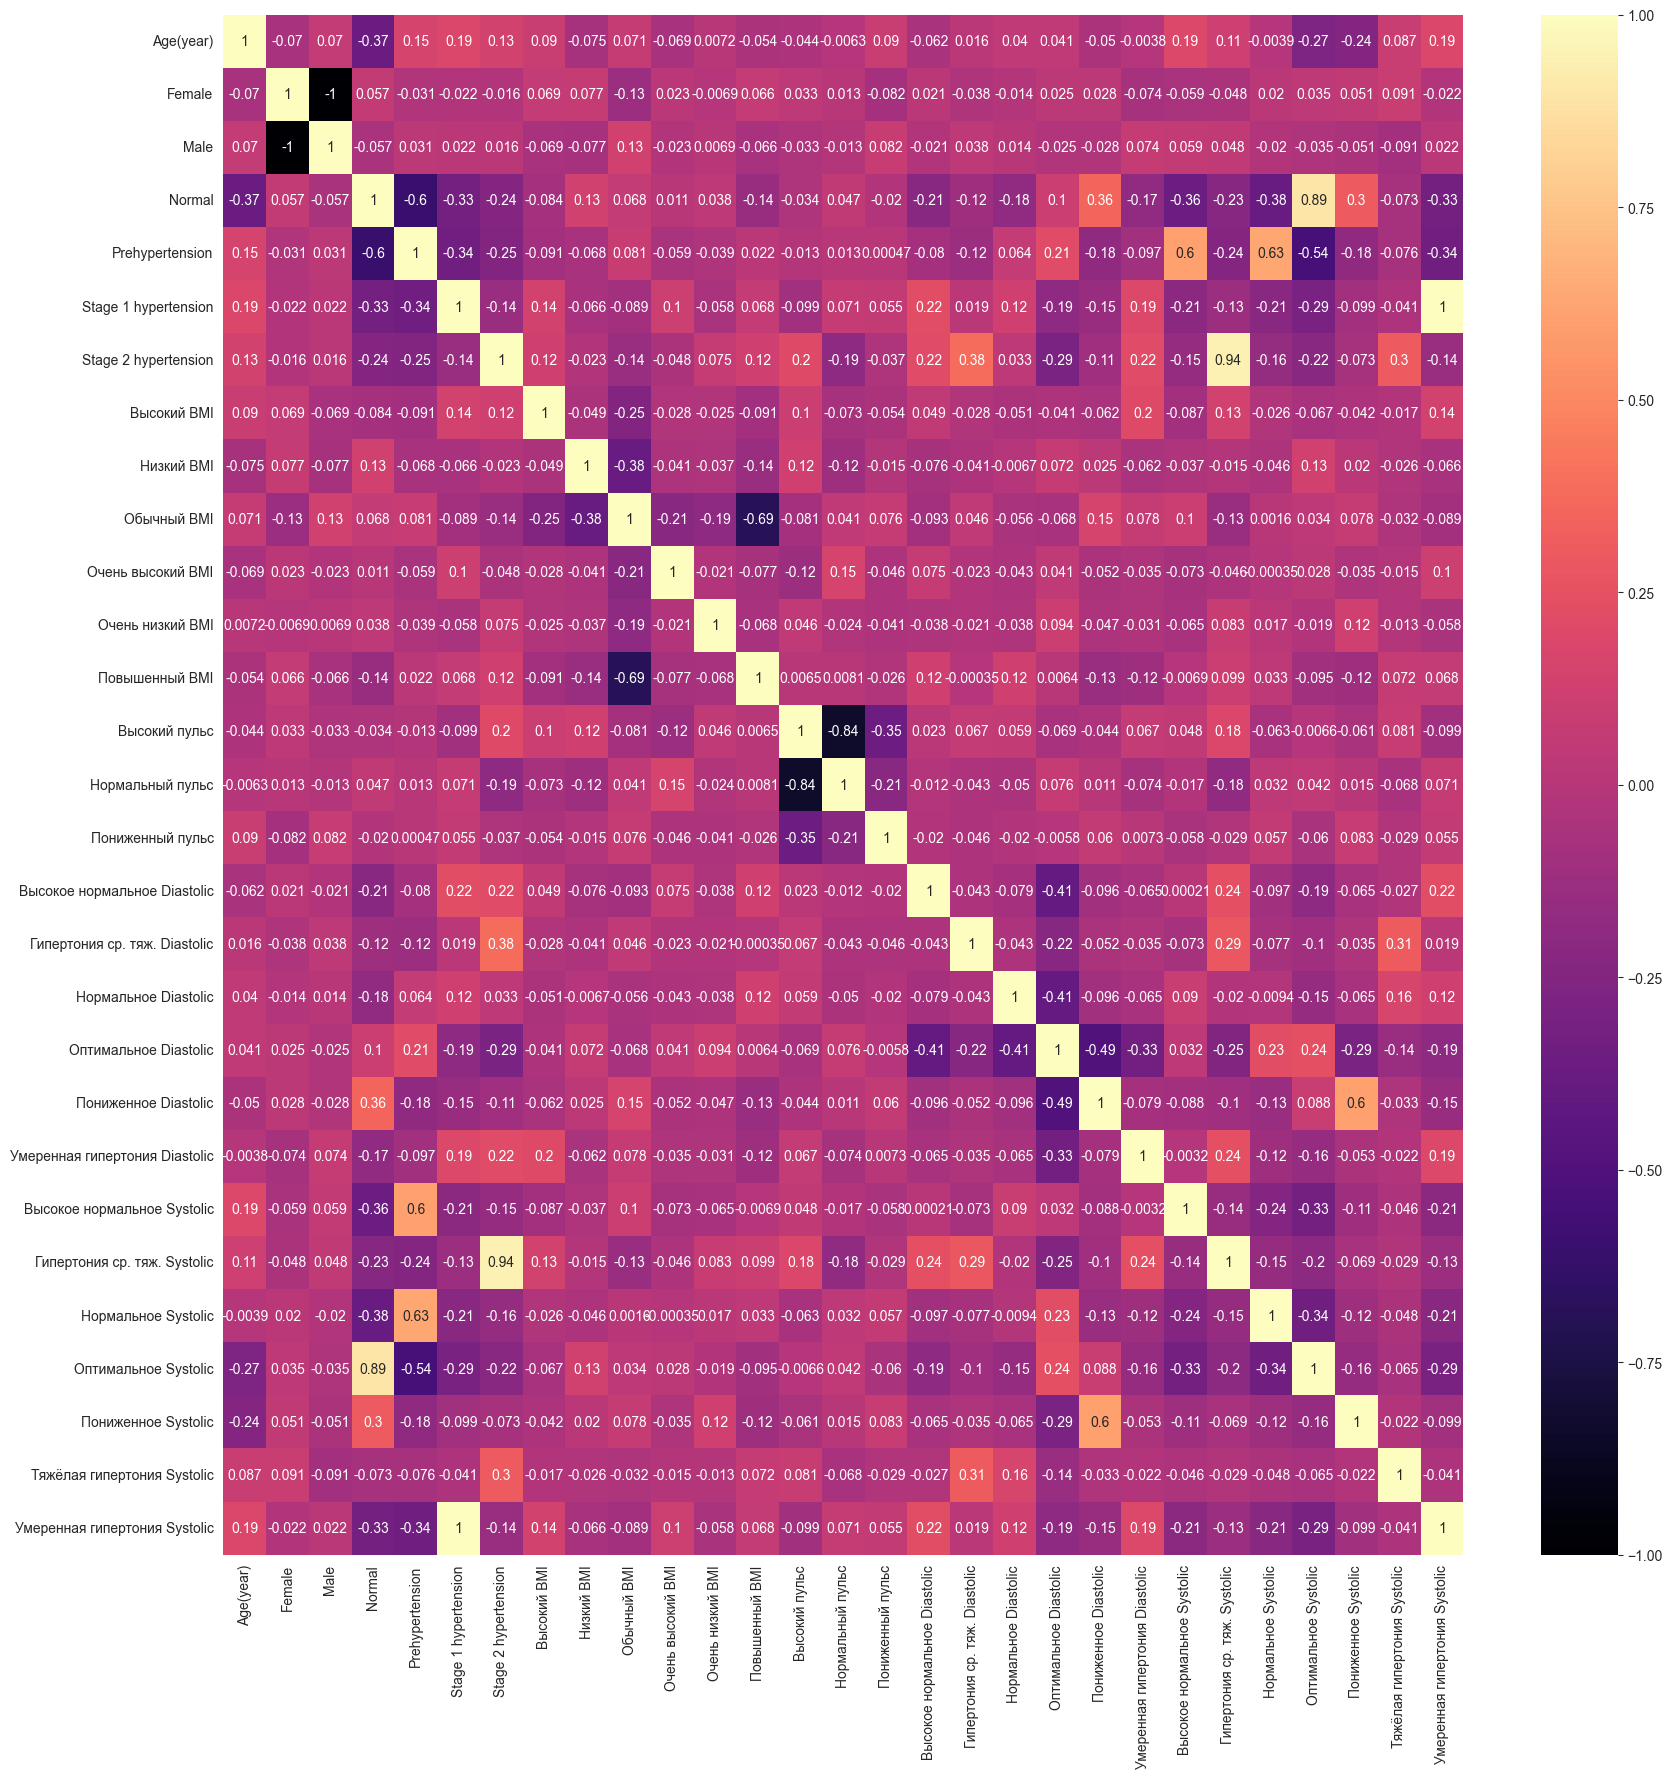

In [87]:
plt.figure(figsize=(20, 20))
sns.heatmap(data=df_dummies.corr(), cmap="magma", annot=True)
plt.show()

Возможно, есть нелинейная связь между признаками и классами

In [47]:
df_dummies = pd.concat([df_copy["Hypertension"], df_dummies], axis = 1)

In [58]:
df_copy

,Sex(M/F),Age(year),Hypertension,Category SBP,Category DBP,Category Pulse,Category BMI
0,Female,45,Stage 2 hypertension,Гипертония ср. тяж. Systolic,Высокое нормальное Diastolic,Высокий пульс,Повышенный BMI
1,Female,50,Stage 2 hypertension,Гипертония ср. тяж. Systolic,Умеренная гипертония Diastolic,Высокий пульс,Обычный BMI
2,Female,47,Normal,Оптимальное Systolic,Оптимальное Diastolic,Высокий пульс,Обычный BMI
3,Male,45,Prehypertension,Высокое нормальное Systolic,Умеренная гипертония Diastolic,Высокий пульс,Обычный BMI
4,Female,46,Prehypertension,Нормальное Systolic,Оптимальное Diastolic,Высокий пульс,Повышенный BMI
...,...,...,...,...,...,...,...
214,Male,24,Normal,Оптимальное Systolic,Оптимальное Diastolic,Высокий пульс,Обычный BMI
215,Female,25,Normal,Пониженное Systolic,Пониженное Diastolic,Высокий пульс,Обычный BMI
216,Male,25,Prehypertension,Нормальное Systolic,Оптимальное Diastolic,Высокий пульс,Низкий BMI
217,Male,25,Normal,Оптимальное Systolic,Оптимальное Diastolic,Нормальный пульс,Обычный BMI


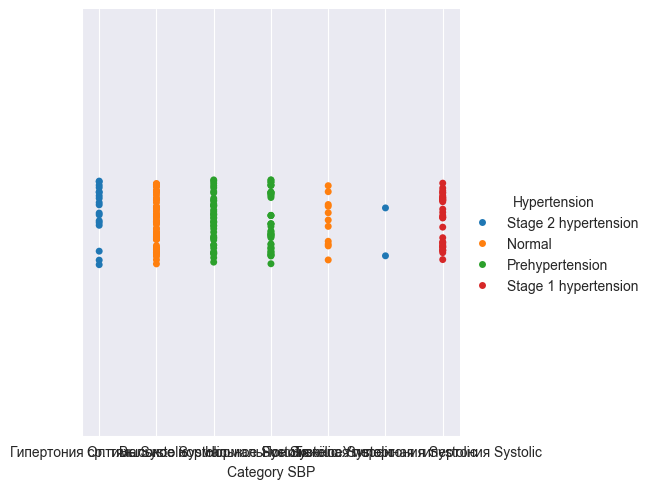

In [70]:
sns.catplot(x = "Category SBP", hue = "Hypertension", data = df_copy)

<Axes: xlabel='Category BMI', ylabel='count'>

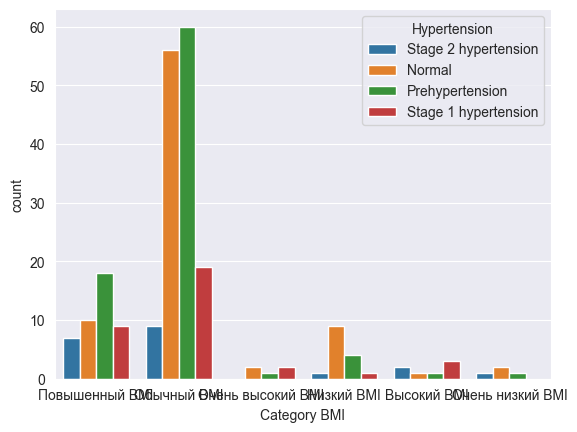

In [69]:
sns.countplot(x = "Category BMI", hue = "Hypertension", data = df_copy)

<Axes: xlabel='Category SBP', ylabel='count'>

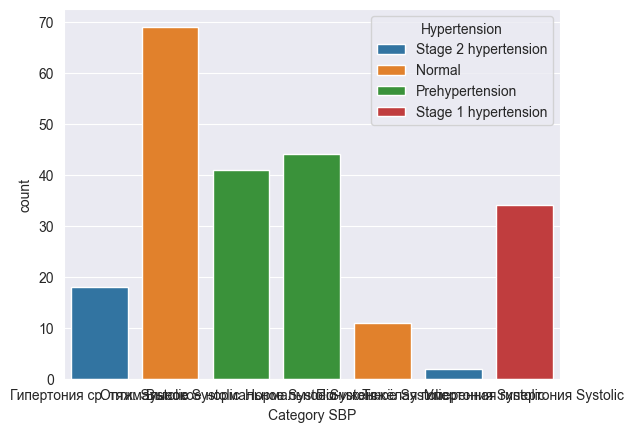

In [71]:
sns.countplot(x = "Category SBP", hue = "Hypertension", data = df_copy)

<Axes: xlabel='Category Pulse', ylabel='count'>

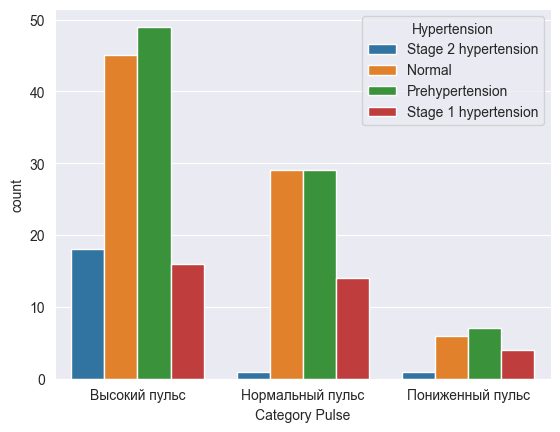

In [72]:
sns.countplot(x = "Category Pulse", hue = "Hypertension", data = df_copy)

In [73]:
df_copy

,Sex(M/F),Age(year),Hypertension,Category SBP,Category DBP,Category Pulse,Category BMI
0,Female,45,Stage 2 hypertension,Гипертония ср. тяж. Systolic,Высокое нормальное Diastolic,Высокий пульс,Повышенный BMI
1,Female,50,Stage 2 hypertension,Гипертония ср. тяж. Systolic,Умеренная гипертония Diastolic,Высокий пульс,Обычный BMI
2,Female,47,Normal,Оптимальное Systolic,Оптимальное Diastolic,Высокий пульс,Обычный BMI
3,Male,45,Prehypertension,Высокое нормальное Systolic,Умеренная гипертония Diastolic,Высокий пульс,Обычный BMI
4,Female,46,Prehypertension,Нормальное Systolic,Оптимальное Diastolic,Высокий пульс,Повышенный BMI
...,...,...,...,...,...,...,...
214,Male,24,Normal,Оптимальное Systolic,Оптимальное Diastolic,Высокий пульс,Обычный BMI
215,Female,25,Normal,Пониженное Systolic,Пониженное Diastolic,Высокий пульс,Обычный BMI
216,Male,25,Prehypertension,Нормальное Systolic,Оптимальное Diastolic,Высокий пульс,Низкий BMI
217,Male,25,Normal,Оптимальное Systolic,Оптимальное Diastolic,Нормальный пульс,Обычный BMI


In [81]:
df_copy_encoded = pd.DataFrame()

for i in df_copy.iloc[:, 2:].columns:
    df_copy_encoded[i] = pd.factorize(df_copy[i])[0]

df_copy_encoded

,Hypertension,Category SBP,Category DBP,Category Pulse,Category BMI
0,0,0,0,0,0
1,0,0,1,0,1
2,1,1,2,0,1
3,2,2,1,0,1
4,2,3,2,0,0
...,...,...,...,...,...
214,1,1,2,0,1
215,1,4,3,0,1
216,2,3,2,0,3
217,1,1,2,1,1


In [82]:
df_copy_encoded["Sex(M/F)"] = pd.factorize(df_copy["Sex(M/F)"])[0]
df_copy_encoded["Age(year)"] = df_copy["Age(year)"]

In [83]:
df_copy_encoded

,Hypertension,Category SBP,Category DBP,Category Pulse,Category BMI,Sex(M/F),Age(year)
0,0,0,0,0,0,0,45
1,0,0,1,0,1,0,50
2,1,1,2,0,1,0,47
3,2,2,1,0,1,1,45
4,2,3,2,0,0,0,46
...,...,...,...,...,...,...,...
214,1,1,2,0,1,1,24
215,1,4,3,0,1,0,25
216,2,3,2,0,3,1,25
217,1,1,2,1,1,1,25


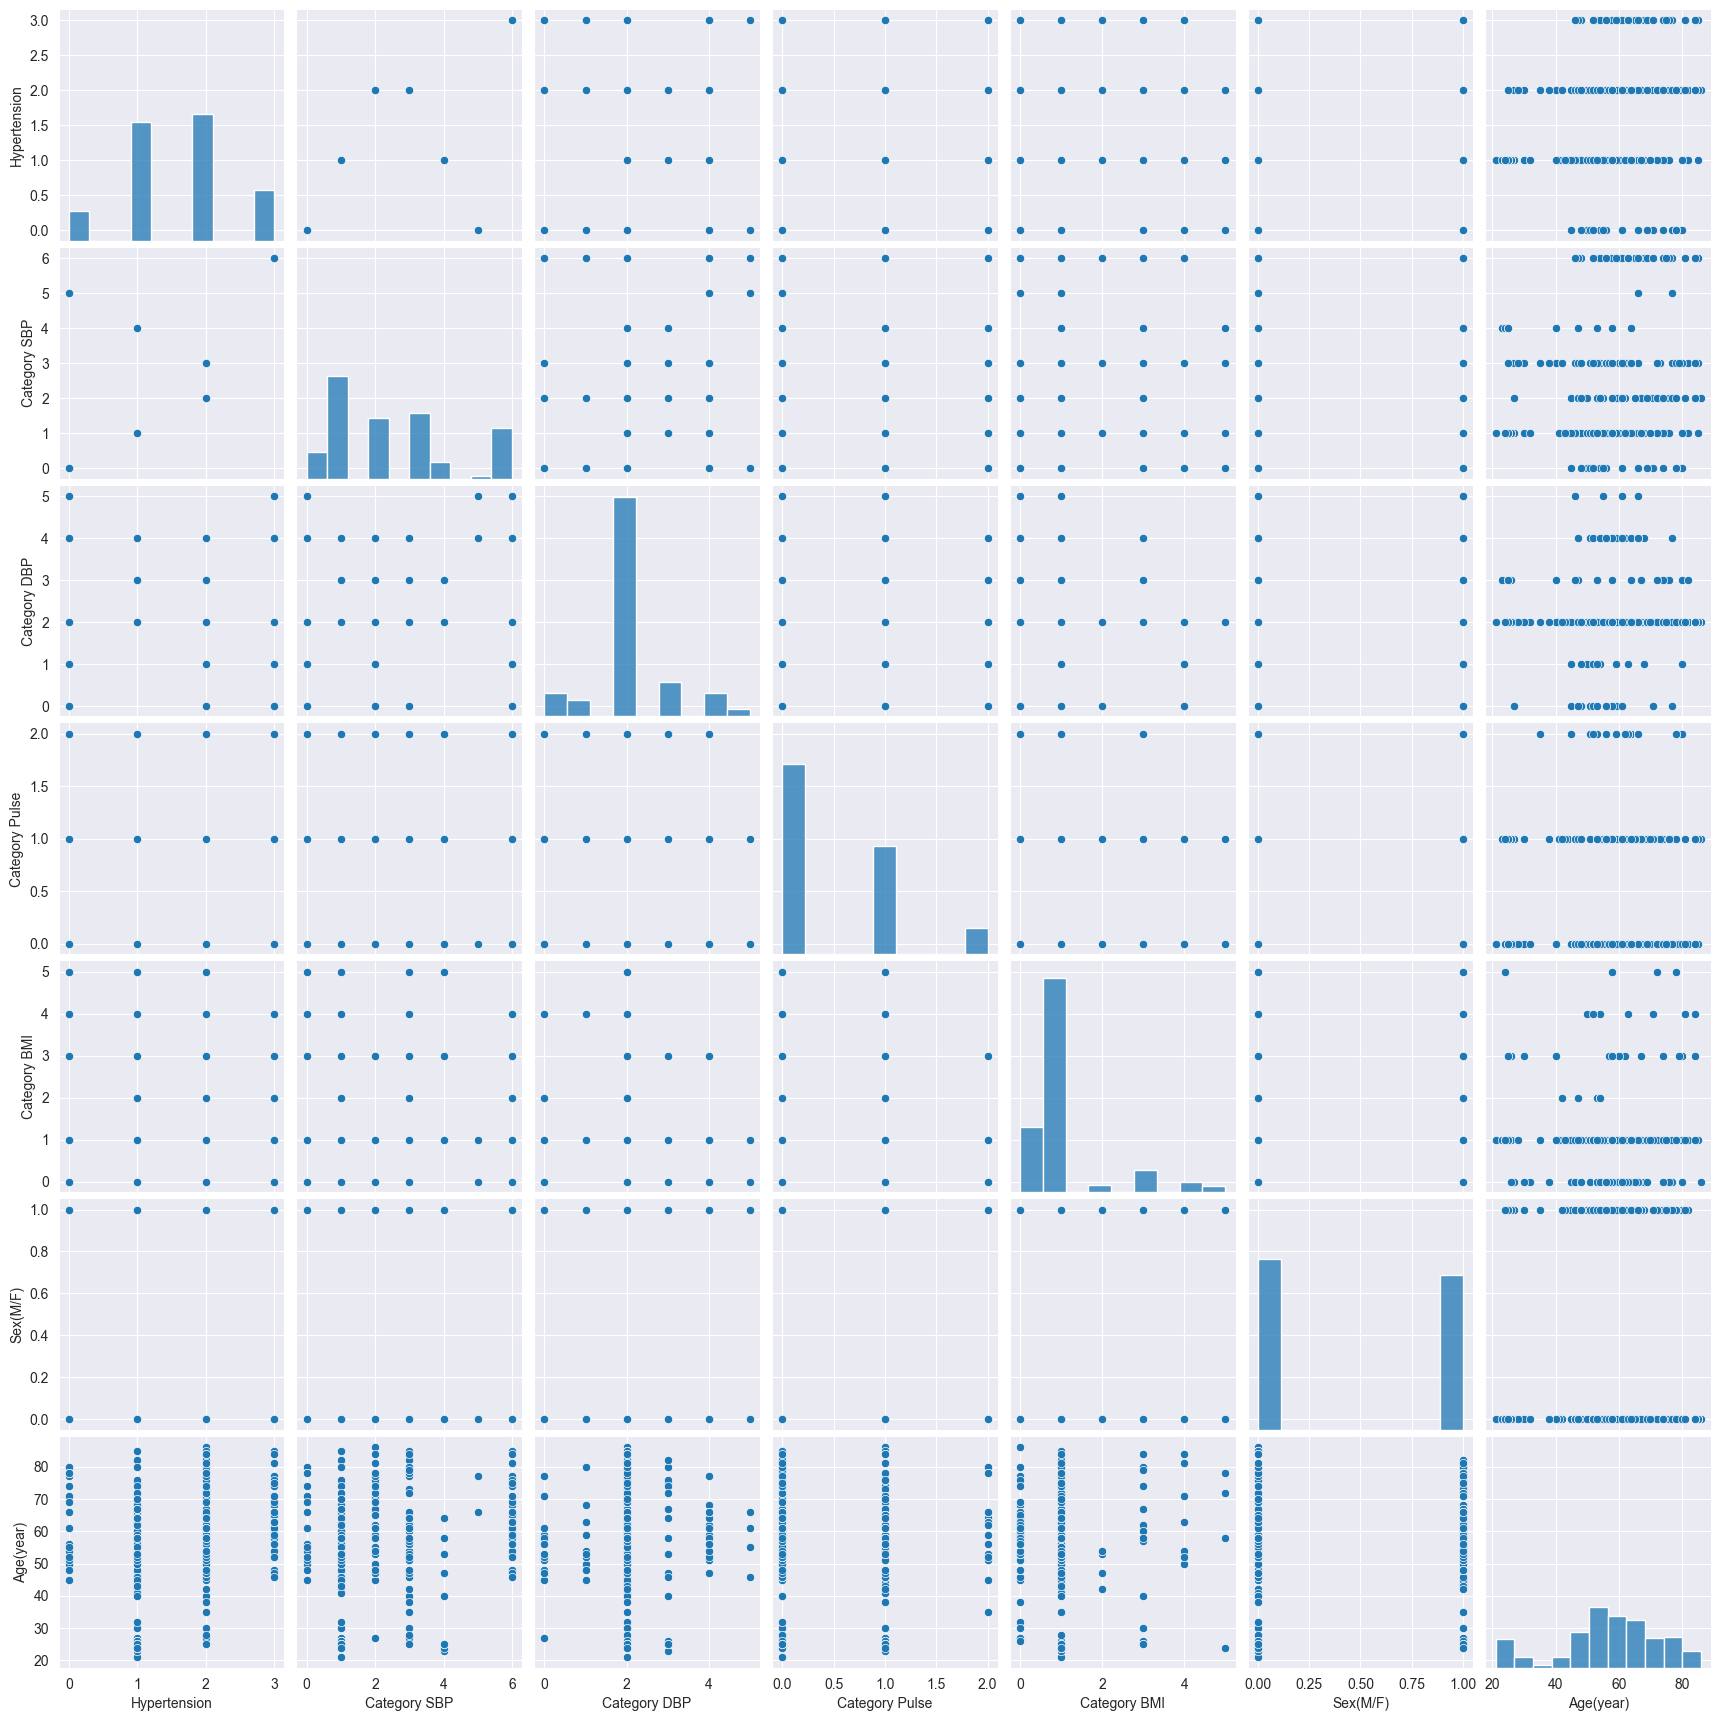

In [84]:
sns.pairplot(df_copy_encoded)

## Построение модели

In [447]:
X = pd.DataFrame(df_copy[["Sex(M/F)", "Category SBP", "Category DBP", "Category BMI", "Category Pulse"]])
y = pd.DataFrame(df_copy[["Hypertension"]])

In [448]:
lb = LabelEncoder()

for i in X.columns:
    X.loc[:, i] = lb.fit_transform(X[i].astype(str))

y.loc[:, "Hypertension"] = lb.fit_transform(y["Hypertension"].astype(str))

In [449]:
X["Age(year)"] = df_copy["Age(year)"]

In [450]:
X = X.astype(int)
y = y.astype(int)

In [451]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state =42)

In [452]:
model = RandomForestClassifier(n_estimators = 100, max_depth = 4)

In [453]:
model.fit(X_train, y_train["Hypertension"])

,n_estimators,100
,criterion,'gini'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [454]:
y_pred = model.predict(X_test)

In [455]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9773


In [456]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.95      1.00      0.97        18
           2       1.00      1.00      1.00         6
           3       1.00      0.67      0.80         3

    accuracy                           0.98        44
   macro avg       0.99      0.92      0.94        44
weighted avg       0.98      0.98      0.98        44



In [457]:
cnf_matrix = confusion_matrix(y_test, y_pred)

print("\nConfusion Matrix:", "\n", cnf_matrix)


Confusion Matrix: 
 [[17  0  0  0]
 [ 0 18  0  0]
 [ 0  0  6  0]
 [ 0  1  0  2]]


In [458]:
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = "Confusion matrix",
                          cmap = plt.get_cmap("Blues")):
    plt.imshow(cm, interpolation = "nearest", cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment = "center",
                 color = "white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Confusion matrix, without normalization
[[17  0  0  0]
 [ 0 18  0  0]
 [ 0  0  6  0]
 [ 0  1  0  2]]


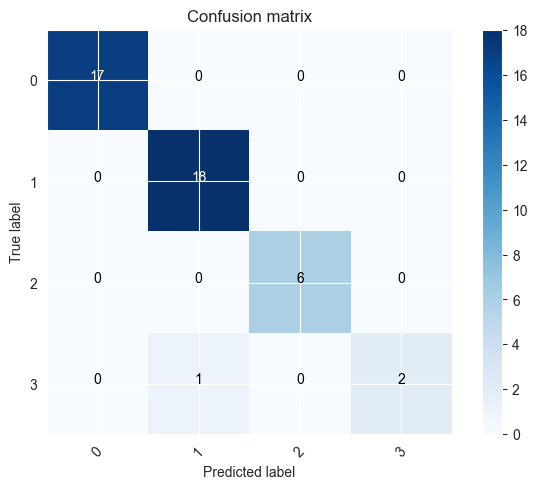

In [459]:
plot_confusion_matrix(cnf_matrix, classes = ["0", "1", "2", "3"], title = "Confusion matrix")

In [460]:
cv_scores = cross_val_score(model, X, y["Hypertension"], cv = 20, scoring = 'accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

Cross-validation scores: [1.         0.90909091 1.         1.         0.90909091 0.90909091
 0.90909091 1.         0.90909091 1.         0.90909091 0.90909091
 0.90909091 0.90909091 0.90909091 1.         0.90909091 0.90909091
 0.90909091 0.9       ]
Mean CV accuracy: 0.9359 (+/- 0.0840)


In [463]:
dump(model, "model.pkl")

['model.pkl']

In [464]:
saved_model = load("model.pkl")

In [465]:
saved_model.predict(X_test)

array([2, 1, 1, 0, 3, 1, 0, 0, 1, 1, 2, 0, 1, 0, 1, 0, 1, 0, 2, 0, 0, 1,
       0, 0, 0, 1, 2, 1, 0, 1, 1, 3, 2, 1, 0, 1, 0, 1, 1, 1, 0, 2, 0, 1])